Source: http://xarray.pydata.org/en/stable/auto_gallery/plot_cartopy_facetgrid.html

In [34]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

This is the map projection we want to plot *onto*

In [35]:
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

Load the data

In [36]:
%%time 
ds = xr.tutorial.load_dataset('air_temperature')

CPU times: user 28.9 ms, sys: 9.55 ms, total: 38.5 ms
Wall time: 38.7 ms


In [37]:
%%time 
air = ds.air.isel(time=[0, 724]) - 273.15

CPU times: user 2.31 ms, sys: 0 ns, total: 2.31 ms
Wall time: 2.25 ms


In [38]:
! jupyter nbextension list

Known nbextensions:
  config dir: /opt/conda/etc/jupyter/nbconfig
    notebook section
      nbresuse/main  enabled 
      - Validating: OK
      jupyter-js-widgets/extension  enabled 
      - Validating: OK


In [42]:
import sys
sys.getsizeof(ds), sys.getsizeof(air) #globals().get(x))
sys.getsizeof(globals().get(x)) for x in 

(56, 56)

Plot air temperature

/opt/conda/lib/python3.7/site-packages/xarray/plot/facetgrid.py:287: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


ValueError: 'box-forced' is not a valid value for adjustable; supported values are 'box', 'datalim'

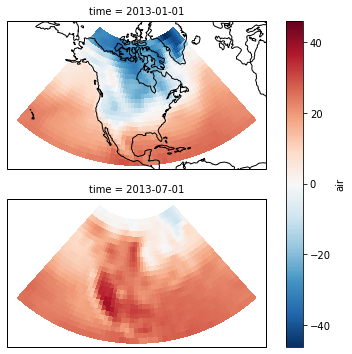

In [41]:
p = air.plot(transform=ccrs.PlateCarree(),            # the data's projection
             col='time', col_wrap=1,                  # multiplot settings
             aspect=ds.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
             subplot_kws={'projection': map_proj})    # the plot's projection

# We have to set the map's options on all four axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])
    # Without this aspect attributes the maps will look chaotic and the
    # "extent" attribute above will be ignored
    ax.set_aspect('equal', 'box-forced')
